In [1]:
from skimage.io import imread_collection
from pyKriging.krige import kriging
from pyKriging.regressionkrige import regression_kriging
# import pyKriging
import pylab
from scipy import fftpack, ndimage
import zimg
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import filters
import cv2
from scipy import fftpack

['images\\img1.jpg', 'images\\img2.jpg', 'images\\img3.jpg', 'images\\img4.jpg', 'images\\img5.jpg', 'images\\img6.jpg', 'images\\img7.jpg', 'images\\img8.jpg']
30


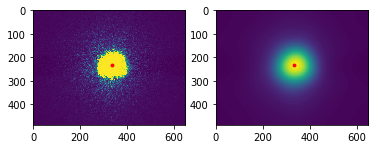

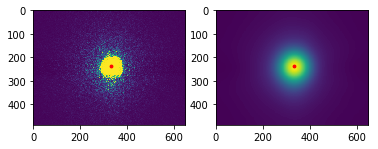

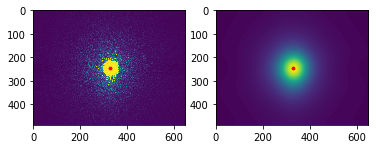

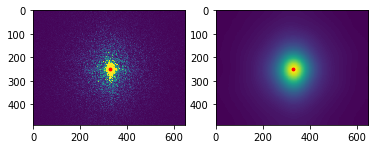

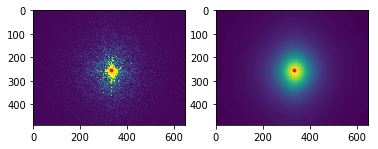

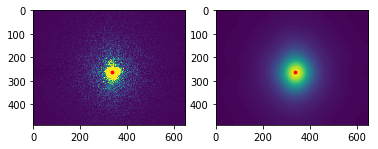

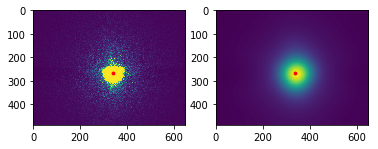

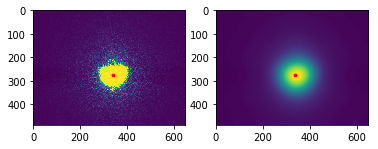

In [2]:
col = imread_collection('images/img*.jpg')
print(col)
holo_z=[0,10,20,30,40,50,60,70,80,90]
img_z=[0,10,20,30,40,50,60,70]
circles=[]
dcts_wo_blur=[]
dcts_w_blur=[]
for blur_diameter in [30]:
    print(blur_diameter)
    dcts_w_blur.append([])
    circles.append([])
    for i in col:    
        plt.subplot(1,2,1)
        i_blur=filters.gaussian_filter(i, (blur_diameter, blur_diameter))
        
        centroid_int = np.unravel_index(i_blur.argmax(), i_blur.shape)
#         circ=(cv2.HoughCircles(i_blur, method=cv2.HOUGH_GRADIENT, dp=1,
#                                minDist=600, minRadius=1, maxRadius=600, param1=10, param2=20)[0][0])
#         circles.append(circ)
        circles[-1].append(centroid_int)
        dct = fftpack.dct(i_blur)
        dcts_w_blur[-1].append(np.max(abs(dct)))
        dct = fftpack.dct(i)
        dcts_wo_blur.append(np.max(abs(dct)))

        plt.imshow(i)
#         plt.scatter(circ[0],circ[1],c='b',s=8)
        plt.scatter(centroid_int[1],centroid_int[0],c='r',s=8)
        plt.subplot(1,2,2)
        plt.imshow(i_blur)
#         plt.scatter(circ[0],circ[1],c='b',s=8)
        plt.scatter(centroid_int[1],centroid_int[0],c='r',s=8)
        plt.show()


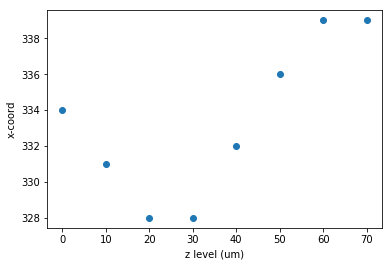

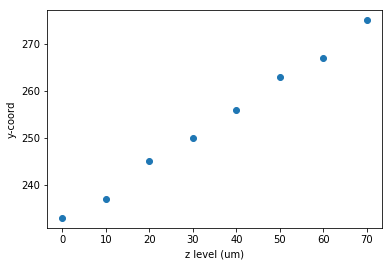

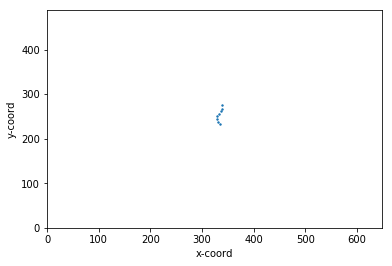

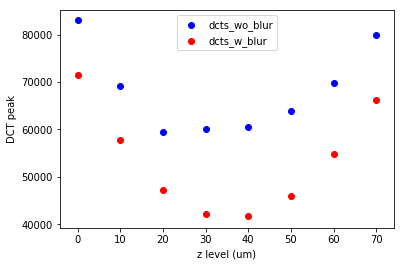

In [3]:
holo_z=[0,10,20,30,40,50,60,70,80,90]
img_z=[0,10,20,30,40,50,60,70]
holo_z=img_z
circles=np.array(circles)
x_coord=circles.T[0]
y_coord=circles.T[1]
# print(circles)
# dcts=np.array(dcts)
# print(dcts)
plt.scatter(holo_z,x_coord)
plt.xlabel('z level (um)')
plt.ylabel('x-coord')
plt.show()
plt.scatter(holo_z,y_coord)
plt.xlabel('z level (um)')
plt.ylabel('y-coord')
plt.show()
plt.scatter(x_coord,y_coord,s=2)
plt.xlabel('x-coord')
plt.ylabel('y-coord')
plt.xlim([0,648])
plt.ylim([0,488])
plt.show()
# plt.scatter(holo_z,circles.T[2])
# plt.xlabel('z level (um)')
# plt.ylabel('diameter')
# plt.show()

plt.scatter(holo_z,dcts_wo_blur,c='b',label='dcts_wo_blur')
plt.scatter(holo_z,dcts_w_blur,c='r',label='dcts_w_blur')
plt.xlabel('z level (um)')
plt.ylabel('DCT peak')
plt.legend()
plt.show()

[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [4. 4.]
 [5. 5.]
 [6. 6.]
 [7. 7.]] [334 331 328 328 332 336 339 339]


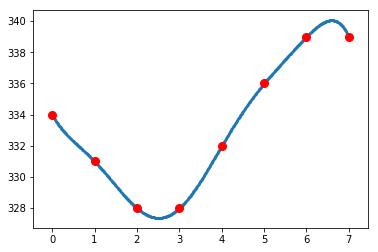

In [4]:
startz=0
endz=7
no_sampling = 1000
search_z = np.linspace(startz, endz, num=endz-startz+1)
search_z = np.asarray(search_z)
search_z2 = np.hstack((np.vstack(search_z), np.vstack(search_z)))
print(search_z2,  np.hstack(x_coord))
yyy=np.hstack(x_coord*1.00)
k_xy = kriging(search_z2,yyy[startz:endz+1] , testPoints=25)
k_xy.thetamin = 1e-5
k_xy.thetamax =1e0
k_xy.pmin = 2
k_xy.pmax = 2
k_xy.train(optimizer='ga')

z_pred = np.linspace(startz, endz, num=1000)
z_pred = np.asarray(z_pred)
z1_pred = np.hstack((np.vstack(z_pred), np.vstack(z_pred)))  # make a 2D input
k_xy_pred=[]
for pt in z1_pred:
#     print(pt)
    k_xy_pred.append(k_xy.predict(pt))
k_xy_pred = np.array(k_xy_pred)
plt.scatter(z_pred,k_xy_pred,s=2)
plt.scatter(search_z,yyy[startz:endz+1],c='r',s=64)

In [5]:
a=[1,2]
b=3
c=np.insert(a,0,b)
print(c)


[3 1 2]
